In [1]:
import pandas as pd
import os
import json
from datetime import datetime, timedelta
from scipy import signal
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
import plotly.express as px

In [2]:
# files = ['primes_both1', 'primes_01', 'primes_10', 'timing'] #, 'primes_01_2', 'timing']
# files = ['plant1_control1_main0_isol_nostress', 'plant0_control0_main0_isol_nostress', 'plant0_control1_main0_isol_nostress', 'plant2_control1_main0_isol_nostress', 'plant2_control1_main0_isol_stress23']
# files = ['plant1_control1_main0_isol_nostress', 'plant0_control0_main0_isol_nostress', 'timing_other', 'timing']
# files = ['timing']
files = ['same_isol']
folder = 'old/'
# files = ['plant1_controller2_isol012_nostress', 'plant1_controller2_isol01_nostress', 'plant1_controller2_isol01_stress23']

# folder = ''
columns = ['Plant', 'Controller','PlantTime', 'ControllerTime']
# columns = ['PlantTime', 'ControllerTime']

# columns = ['thread1', 'thread2']

In [3]:
df = {}

for file in files:
    df[file] = pd.read_csv('outputs/' + folder + file + '.csv', header=0)
# df['timing']

In [4]:
df['20sim'] = pd.read_csv('outputs/values.csv', header=0)
df['20sim']

time{s}  Controller\ControllerPan\SetPointPan  \
0       0.000                                   0.0   
1       0.001                                   0.0   
2       0.002                                   0.0   
3       0.003                                   0.0   
4       0.004                                   0.0   
...       ...                                   ...   
8002    7.996                                   0.0   
8003    7.997                                   0.0   
8004    7.998                                   0.0   
8005    7.999                                   0.0   
8006    8.000                                   0.0   

      Plant\Plant\ThetaPan\q{rad}  Controller\ControllerPan\PID_Pan\output{A}  
0                    0.000000e+00                                0.000000e+00  
1                    0.000000e+00                                0.000000e+00  
2                    0.000000e+00                                0.000000e+00  
3                    0.000000e+00                                0.000000e+00  
4                    0.000000e+00                                0.000000e+00  
...                           ...                                         ...  
8002                -4.470630e-09                               -3.426329e-10  
8003                -4.452274e-09                               -3.365426e-10  
8004                -4.434272e-09                               -3.305494e-10  
8005                -4.416619e-09                               -3.246522e-10  
8006                -4.399307e-09                               -3.188496e-10  

[8007 rows x 4 columns]

In [5]:
for file in files:
    print(file + ': ' + str(len(df[file].index)))
    df[file] = df[file].iloc[25: , :]
    df[file] = df[file][:-25]
    for column in columns:
        df[file][str(column)+"Diff"] = df[file][column].diff()
        df[file][str(column)+'jitter'] = df[file][str(column) +'Diff']- 0.001
        df[file][str(column)+'jitter'] = df[file][str(column)+'jitter'].abs()
#         df[file] = df[file][df[file][str(column)+'jitter'] < 0.0009]
        
#         df[file] = df[file][df[file][str(column)+'jitter'] > -0.009]
        print("file: ", file, "column:", column)
        print(df[file][str(column) + 'jitter'].max())
        print(df[file][df[file][str(column) + 'jitter'] > 30e-6])

        
# df['primes_01'] = df['primes_01'].iloc[0:5000]
# df['primes_01']

same_isol: 10756
file:  same_isol column: Plant
0.008786202250875008
       ControllerTime    Controller  PlantTime         Plant  PlantDiff  \
26           0.027058  0.000000e+00   0.027050  0.000000e+00        0.0   
27           0.028058  0.000000e+00   0.028050  0.000000e+00        0.0   
28           0.029056  0.000000e+00   0.029050  0.000000e+00        0.0   
29           0.030056  0.000000e+00   0.030050  0.000000e+00        0.0   
30           0.031056  0.000000e+00   0.031050  0.000000e+00        0.0   
...               ...           ...        ...           ...        ...   
10726       10.727053  1.028769e-10  10.727046 -3.455641e-09        0.0   
10727       10.728054  1.028769e-10  10.728046 -3.455641e-09        0.0   
10728       10.729054  1.028769e-10  10.729046 -3.455641e-09        0.0   
10729       10.730053  1.028769e-10  10.730046 -3.455641e-09        0.0   
10730       10.731053  1.028769e-10  10.731046 -3.455641e-09        0.0   

       Plantjitter  
26       

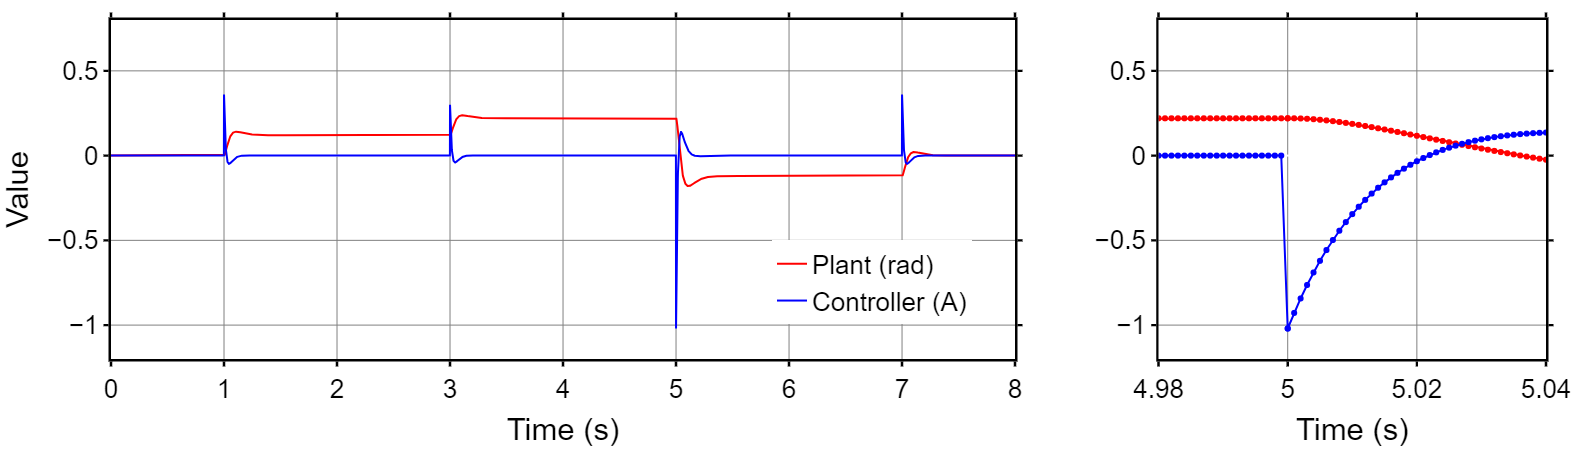

In [12]:
fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.3])
fig.add_trace(go.Scatter(x=df['20sim']['time{s}'],y=df['20sim']['Plant\Plant\ThetaPan\q{rad}'], name = 'Plant (rad)',  line=dict(width=2, color='red'),legendgroup="1"), row =1, col =1)
fig.add_trace(go.Scatter(x=df['20sim']['time{s}'],y=df['20sim']['Controller\ControllerPan\PID_Pan\output{A}'], name = 'Controller (A)', line=dict(width=2, color='blue'),legendgroup="1"), row=1, col=1)
fig.add_trace(go.Scatter(x=df['20sim']['time{s}'],y=df['20sim']['Plant\Plant\ThetaPan\q{rad}'], name = 'Plant (rad)',  line=dict(width=2, color='red'),legendgroup="1", mode='lines+markers'), row =1, col =2)
fig.add_trace(go.Scatter(x=df['20sim']['time{s}'],y=df['20sim']['Controller\ControllerPan\PID_Pan\output{A}'], name = 'Controller (A)',  line=dict(width=2, color='blue'),legendgroup="1", mode='lines+markers'), row=1, col=2)
font_dict=dict(family='Arial',
               size=26,
               color='black'
               )
fig.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='white',  # background color
#                   width=1000,  # figure width
#                   height=700,  # figure height
                  margin=dict(r=20,t=20,b=10)  # remove white space 
                  )
fig.update_yaxes(title_text='Value',  # axis label
                 
                  range=(-1.2, 0.8),
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=2.4, # line size
                 ticks='outside',  # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror='allticks',  # add ticks to top/right axes
                 tickwidth=2.4,  # tick width
                 tickcolor='black',  # tick color
                 showgrid=True,
                 gridcolor='grey',
                 
                 )
fig.update_xaxes(title_text='Time (s)',
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 linewidth=2.4,
                 ticks='outside',
                 tickfont=font_dict,
                 mirror='allticks',
                 tickwidth=2.4,
                 tickcolor='black',
                                  showgrid=True,
                 gridcolor='grey',
                 )
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.35,
    xanchor="right",
    x=0.6
))
fig.layout.xaxis.update(
    range=(0, 8),
)
fig.layout.xaxis2.update(
    range=(4.98, 5.04),
)
fig.layout.yaxis2.update(
   title_text=''
)
fig.data[2].update(showlegend=False)
fig.data[3].update(showlegend=False)
fig.show()

In [7]:
# fig.data[1].update(show)

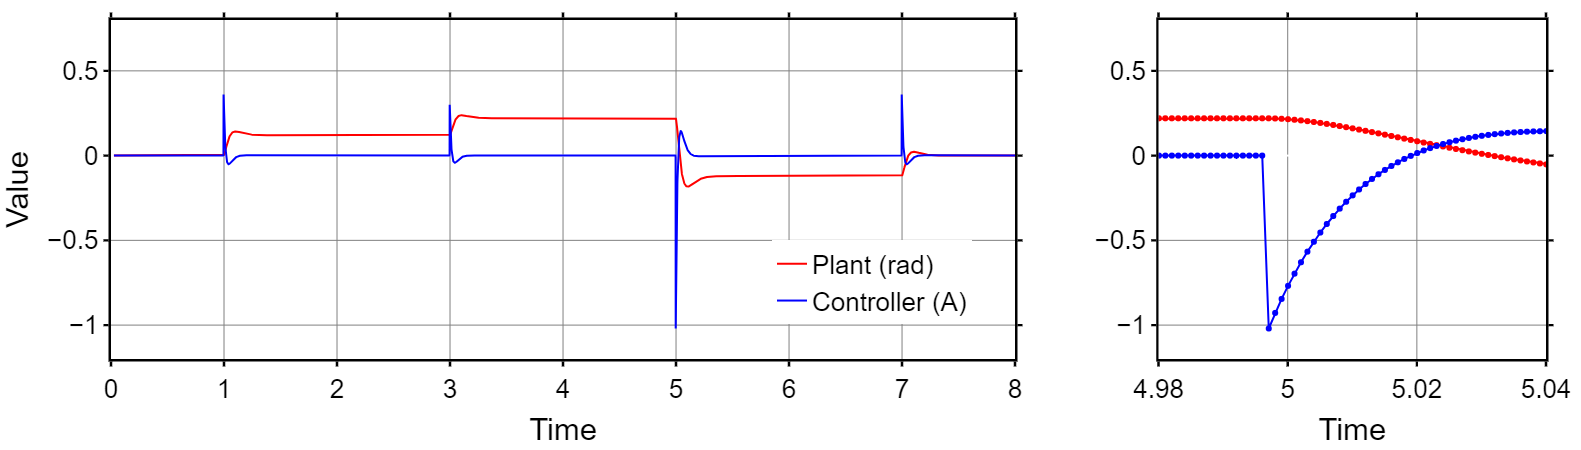

In [11]:
fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.3])
fig.add_trace(go.Scatter(x=df[files[-1]]['PlantTime'],y=df[files[-1]]['Plant'], name = 'Plant (rad)',  line=dict(width=2, color='red'),legendgroup="1"), row =1, col =1)
fig.add_trace(go.Scatter(x=df[files[-1]]['ControllerTime'],y=df[files[-1]]['Controller'], name = 'Controller (A)', line=dict(width=2, color='blue'),legendgroup="1"), row=1, col=1)
fig.add_trace(go.Scatter(x=df[files[-1]]['PlantTime'],y=df[files[-1]]['Plant'], name = 'Plant (rad)',  line=dict(width=2, color='red'),legendgroup="1", mode='lines+markers'), row =1, col =2)
fig.add_trace(go.Scatter(x=df[files[-1]]['ControllerTime'],y=df[files[-1]]['Controller'], name = 'Controller (A)',  line=dict(width=2, color='blue'),legendgroup="1", mode='lines+markers'), row=1, col=2)
font_dict=dict(family='Arial',
               size=26,
               color='black'
               )
fig.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='white',  # background color
#                   width=1000,  # figure width
#                   height=700,  # figure height
                  margin=dict(r=20,t=20,b=10)  # remove white space 
                  )
fig.update_yaxes(title_text='Value',  # axis label
                 
                  range=(-1.2, 0.8),
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=2.4, # line size
                 ticks='outside',  # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror='allticks',  # add ticks to top/right axes
                 tickwidth=2.4,  # tick width
                 tickcolor='black',  # tick color
                 showgrid=True,
                 gridcolor='grey',
                 
                 )
fig.update_xaxes(title_text='Time (s)',
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 linewidth=2.4,
                 ticks='outside',
                 tickfont=font_dict,
                 mirror='allticks',
                 tickwidth=2.4,
                 tickcolor='black',
                                  showgrid=True,
                 gridcolor='grey',
                 )
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.35,
    xanchor="right",
    x=0.6
))
fig.layout.xaxis.update(
    range=(0, 8),
)
fig.layout.xaxis2.update(
    range=(4.98, 5.04),
)
fig.layout.yaxis2.update(
   title_text=''
)
fig.data[2].update(showlegend=False)
fig.data[3].update(showlegend=False)
fig.show()

In [9]:

titles = [(str(file) +"_"+ column) for file in files for column in columns]
# titles = ["(a) Plant on core 1 (isolated)", "(b) Controller on core 2 (isolated)", "(c) Plant on core 1 (isolated)", "(d) Controller on core 2 (shared)", "(e) Plant on core 1(isolated)", 
#           "(f) Controller on core 2 (shared + stressed)"]
titles = ['Plant', 'Controller']
# print(titles)
fig = make_subplots(rows=len(files), cols = 2,subplot_titles=(titles), print_grid=True, vertical_spacing = 0.16)
fig.update_annotations(font_color = 'black', font_family = 'Arial', font_size = 20)
print(fig.layout.annotations[1]['y'])


colit=1
rowit=1
colorit = 0
plotit=1
for file in files:
    for column in columns:
        fig.add_trace(go.Histogram(x=df[file][str(column) + 'jitter'],
                 marker_color=px.colors.qualitative.Plotly[colorit % len(px.colors.qualitative.Plotly)], xbins=dict(size=2e-7)),
                  row=rowit, 
                   col=colit,
        )
        fig.add_vline(x=df[file][str(column) + 'jitter'].max(),
                      row=rowit, 
                      col=colit, 
                      line_width=1, 
                      line_color='red'
        )
        fig.add_annotation(
            text=str(round(df[file][str(column) + 'jitter'].max()*10e5, 1)) + ' \u03BC'+'s',
            xref="x"+(str(plotit) if plotit>1 else ""), 
            yref="y"+(str(plotit) if plotit>1 else ""),
            showarrow=False if (df[file][str(column) + 'jitter'].max()<50e-6) else True,
            arrowcolor = 'red',
            arrowside = 'end',
            arrowhead = 5,
            x=df[file][str(column) + 'jitter'].max()+3e-6 if (df[file][str(column) + 'jitter'].max()<40e-6) else 47e-6,
            y=500,
            ax = -50,
            ay = 0,
            font=dict(
                family="Arial",
                size=15,
                color="red"
            
            )
        )
        fig.layout.annotations[plotit-1].update(y=(fig.layout.annotations[plotit-1]['y']+0.02))

        plotit +=1
        colit += 1
        colorit+=1
    colit = 1
    rowit += 1

# choose the figure font
axis_font=dict(family='Arial',
               size=15,
               color='black'
               )

fig.update_layout(  # font formatting
                  plot_bgcolor='white',  # background color
                   width=1300,  # figure width
                   height=(len(files)*300),  # figure height
                   showlegend=False,
                  margin=dict(r=10,l=10,t=100,b=0)  # remove white space 
                  )
fig.update_yaxes(title_text='No of occurences',  # axis label
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=2.4, # line size
                 ticks='outside',  # ticks outside axis
                 titlefont = axis_font,
                 tickfont=axis_font, # tick label font
                 range=(0, 1000),
                 mirror='allticks',  # add ticks to top/right axes
                 tickwidth=2.4,  # tick width
                 tickcolor='black',  # tick color
                 )
fig.update_xaxes(title_text='Jitter (' + '\u03BC' +'s)',
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 titlefont = axis_font,
                 linewidth=2.4,
                 ticks='outside',
                 range=(0, 50e-6),
                 tickfont=axis_font,
                 mirror='allticks',
                 tickwidth=2.4,
                 tickcolor='black',
                 )
# fig.update_annotations(font_size=20)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]

1.0


Exception: The (row, col) pair sent is out of range. Use Figure.print_grid to view the subplot grid. 